In [1]:
import scipy.io
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
mat = scipy.io.loadmat('datos_wdbc.mat')

In [2]:
model = GaussianNB()
model_d = MultinomialNB()
dic = dict()

In [3]:
def data_positive(data):
  
    data[data<=0] = .001
    return data

def class_separator(data):
    sep = dict()
    for i in range(len(data)):
        vector = data[i]
        class_value = vector[-1]
        if (class_value not in sep):
            sep[class_value] = list()
        sep[class_value].append(vector)
    return sep    

def mean(units):
    return sum(units)/float(len(numbers))

def stdev(units):
    avg = mean(units)
    variance = sum([(x-avg)**2 for x in units]) / float(len(units))
    return np.sqrt(variance)

def calcs(data):
    
    op = [(mean(i), stdev(i), len(i)) for i in data]
    del(op[-1])
    return op

def byclas(data):
    sep = class_separator(data)
    op = {}
    for clas_value, ita in sep.items():
        op[clas_value] = calcs(ita)
    return op

def toCox(data):
    nuevo = []
    
    return data

In [4]:
trn = mat['trn']
clas = trn['y'][0,0]
xc = trn['xc'][0,0]
xd = trn['xd'][0,0]

#datos discretos
discrets = pd.DataFrame(data=xd)
#datos continuos
continuos = pd.DataFrame(data=xc)

In [5]:
#Train and test sets of discretos
D_train, D_test, c_train, c_test = train_test_split(discrets, clas, shuffle=False)

In [6]:
print("DATOS DISCRETOS")
print('Number of rows in the total set: {}'.format(discrets.shape[0]))
print('Number of rows in the training set: {}'.format(D_train.shape[0]))
print('Number of rows in the test set: {}\n'.format(D_test.shape[0]))


DATOS DISCRETOS
Number of rows in the total set: 569
Number of rows in the training set: 426
Number of rows in the test set: 143



In [7]:
#train model Multinomial
model_d.fit(D_train, c_train.ravel())
predict_train = model_d.predict(D_test)

In [8]:
print('Accuracy score: ', format(accuracy_score(c_test, predict_train)))
print('Precision score: ', format(precision_score(c_test, predict_train)))
print('Recall score: ', format(recall_score(c_test, predict_train)))
print('F1 score: ', format(f1_score(c_test, predict_train))+'\n')

Accuracy score:  0.9440559440559441
Precision score:  0.8857142857142857
Recall score:  0.8857142857142857
F1 score:  0.8857142857142857



In [9]:
#Train and test sets of Continuos
C_train, C_test, cl_train, cl_test = train_test_split(continuos, clas, shuffle=False)
print("DATOS CONTINUOS")
print('Number of rows in the total set: {}'.format(continuos.shape[0]))
print('Number of rows in the training set: {}'.format(C_train.shape[0]))
print('Number of rows in the test set: {}\n'.format(C_test.shape[0]))


DATOS CONTINUOS
Number of rows in the total set: 569
Number of rows in the training set: 426
Number of rows in the test set: 143



In [10]:
#Continuos normales

#Train model gaussian

model.fit(C_train,cl_train.ravel())
predict_train = model.predict(C_test)

print('Accuracy score: ', format(accuracy_score(cl_test, predict_train)))
print('Precision score: ', format(precision_score(cl_test, predict_train)))
print('Recall score: ', format(recall_score(cl_test, predict_train)))
print('F1 score: ', format(f1_score(cl_test, predict_train))+'\n')

Accuracy score:  0.965034965034965
Precision score:  0.9166666666666666
Recall score:  0.9428571428571428
F1 score:  0.9295774647887323



Text(30.5, 0.5, 'Predicted')

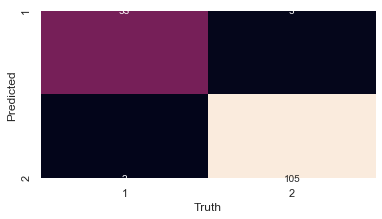

In [11]:
mat = confusion_matrix(predict_train, cl_test)
names = np.unique(predict_train)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
             xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [12]:
newl = []
box = np.zeros((569,30))
#Box Cox
fixed = data_positive(continuos)
for i in fixed:
    train_data, fitted_lambda = stats.boxcox(fixed[i][:])
    newl.append(train_data)



newl = np.asmatrix(newl).T        
Cox_train, Cox_test, clox_train, clox_test = train_test_split(newl, clas, shuffle=False)

In [13]:
model.fit(Cox_train,cl_train.ravel())
predict_train = model.predict(Cox_test)
print("DATOS CONTINUOS BOXCOX")
print('Accuracy score: ', format(accuracy_score(clox_test, predict_train)))
print('Precision score: ', format(precision_score(clox_test, predict_train)))
print('Recall score: ', format(recall_score(clox_test, predict_train)))
print('F1 score: ', format(f1_score(clox_test, predict_train))+'\n')


DATOS CONTINUOS BOXCOX
Accuracy score:  0.958041958041958
Precision score:  0.8717948717948718
Recall score:  0.9714285714285714
F1 score:  0.9189189189189189



Text(0.5, 1.0, 'Probplot after Yeo-Johnson transformation')

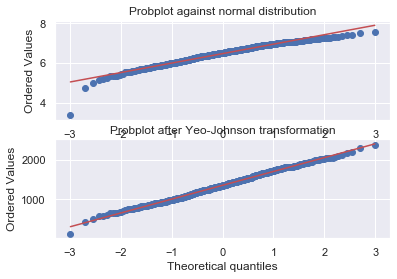

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
xt, lmbda = stats.yeojohnson(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Yeo-Johnson transformation')